In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
folder_path = "horses"
horse_images = []

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        # Resize image to 128x128 pixels
        #img = cv2.resize(img, (128, 128))
        if img is not None:
            img = img.astype(np.float32) / 255.0 
            horse_images.append(img)

print("Total horse images loaded:", len(horse_images))

Total horse images loaded: 327


In [25]:
# Convert list of images to numpy array
horse_images = np.array(horse_images)

In [26]:
# Flatten images
#horse_images_flat= np.array([image.flatten() for image in horse_images])
horse_images_flat = horse_images.reshape(horse_images.shape[0], -1)

In [27]:
mean_horse = np.mean(horse_images_flat, axis=0)
horse_images_centered = horse_images_flat - mean_horse
U, S, VT = np.linalg.svd(horse_images_centered, full_matrices=False)

In [28]:
# Discard the two largest singular values
S_sorted = np.sort(S)[::-1]
S = S_sorted[2:]

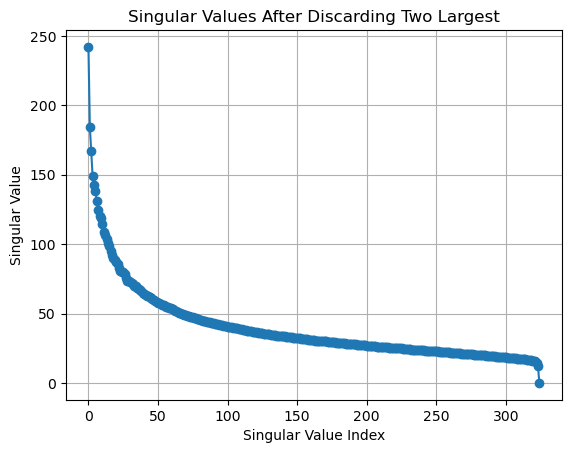

In [29]:
# Plot the remaining singular values sorted in decreasing order
plt.plot(S, marker='o', linestyle='-')
plt.title("Singular Values After Discarding Two Largest")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.grid("True")
plt.show()

In [30]:
# Project onto the first and second principal components
projected_data = np.dot(horse_images_centered, VT[:2].T)

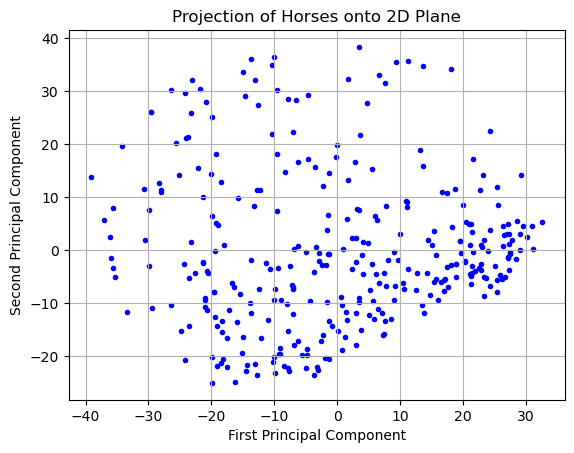

In [31]:
# Plot the graph
plt.scatter(projected_data[:, 0], projected_data[:, 1], marker='.', color='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of Horses onto 2D Plane')
plt.grid(True)
plt.show()

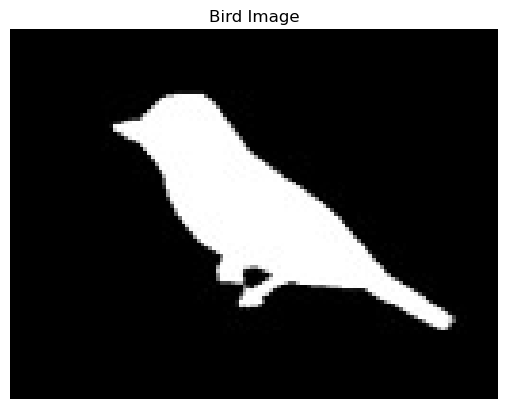

In [22]:
# Load bird image
bird_image_path = "/Users/kamal/Documents/Deepak/bird038.png"
bird_image = Image.open(bird_image_path)
bird_image_array = np.array(bird_image) / 255.0
plt.imshow(bird_image)
plt.axis('off')  # Hide axis
plt.title('Bird Image')
plt.show()

In [87]:
# Flatten the bird image
bird_image_flat = bird_image_array.reshape(1, -1)

In [88]:
#mean_horse_reshaped = mean_horse.reshape(bird_image_flat.shape)
mean_horse_reshaped = mean_horse.reshape(bird_image_flat.shape) 

ValueError: cannot reshape array of size 49152 into shape (1,37248)

In [89]:
# Subtract mean of horses and project to the PCs of the horses
bird_image_centered = (bird_image_flat - mean_horse)
bird_projected = np.dot(bird_image_centered, VT[:2].T)

ValueError: operands could not be broadcast together with shapes (1,37248) (49152,) 

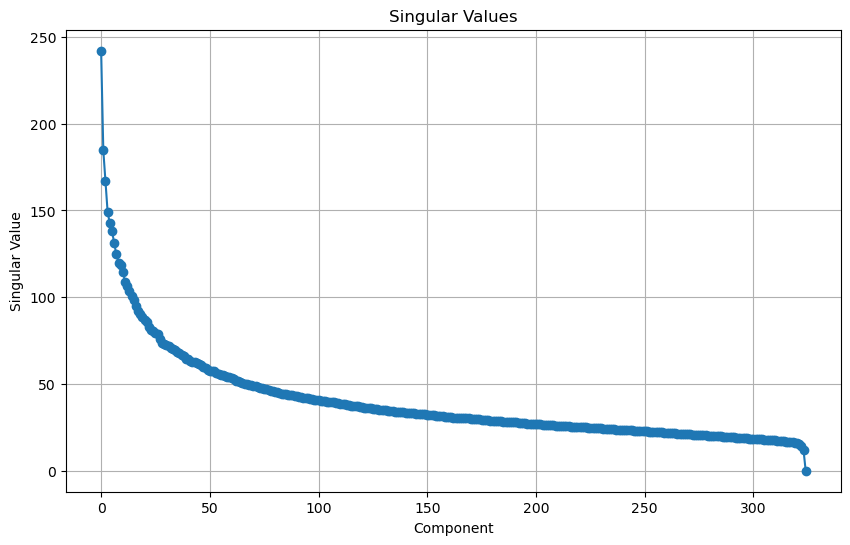

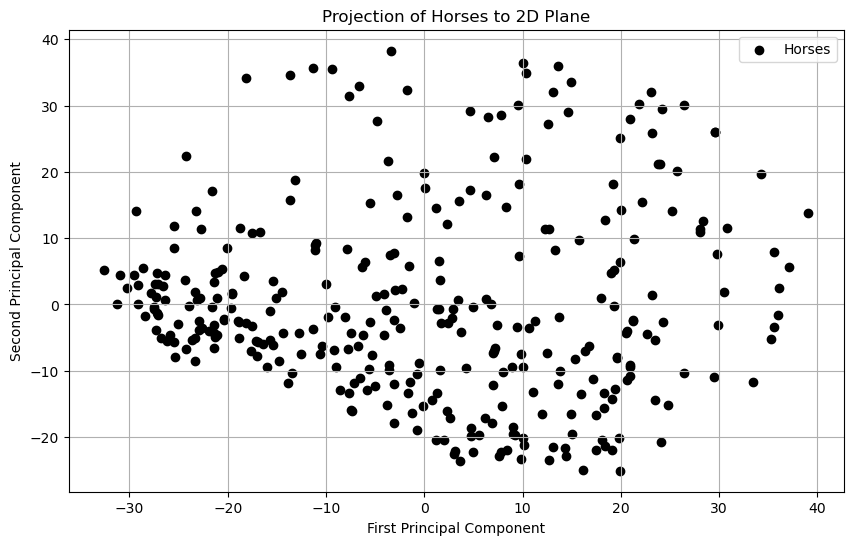

ValueError: cannot reshape array of size 49152 into shape (128,3)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Load bird image
bird_img = np.array(Image.open('/Users/kamal/Documents/Deepak/bird038.png').convert('L')) / 255.0

# Load horse images
folder_path = "horses"
horse_images = []

for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
         # Resize image to 128x128 pixels
        img = cv2.resize(img, (128, 128))
        if img is not None:
            img = img.astype(np.float32) / 255.0  # Divide by 255
            horse_images.append(img)

# Convert list of images to a numpy array
horse_images = np.array(horse_images)

# Reshape images for PCA
n_samples, height, width = horse_images[0].shape
horse_images_reshaped = horse_images.reshape(horse_images.shape[0], -1)
#horse_images_reshaped = horse_images.reshape((n_samples, height * width))

# Perform PCA on horse images
pca = PCA()
pca.fit(horse_images_reshaped)

# a) Plot singular values
plt.figure(figsize=(10, 6))
plt.plot(pca.singular_values_[2:], marker='o')
plt.title('Singular Values')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# b) Plot coordinates of horses projected to 2D plane
horse_projected = pca.transform(horse_images_reshaped)[:, :2]
plt.figure(figsize=(10, 6))
plt.scatter(horse_projected[:, 0], horse_projected[:, 1], c='black', label='Horses')
plt.title('Projection of Horses to 2D Plane')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()

'''
# c) Plot projections of horses and bird
mean_horses = np.mean(horse_images_reshaped, axis=0)
bird_reshaped = bird_img.reshape((1, height * width))
bird_projected = pca.transform(bird_reshaped - mean_horses)[:, :2]

plt.figure(figsize=(10, 6))
plt.scatter(horse_projected[:, 0], horse_projected[:, 1], c='black', label='Horses')
plt.scatter(bird_projected[:, 0], bird_projected[:, 1], c='red', marker='x', label='Bird')
plt.title('Projection of Horses and Bird to 2D Plane')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()
'''

mean_horses = np.mean(horse_images_reshaped, axis=0)



# d) Display horse060.png and its binary reconstruction
horse060_img = horse_images[59]  # 0-based indexing
horse060_reshaped = horse060_img.reshape((1, -1))
horse060_projected = pca.transform(horse060_reshaped - mean_horses)[:, :20]
horse060_reconstructed = np.dot(horse060_projected, pca.components_[:20]) + mean_horses
horse060_binary_reconstruction = (horse060_reconstructed > 0.5).reshape((height, width))

plt.figure(figsize=(6, 6))
plt.imshow(horse060_img, cmap='gray')
plt.title('Original Horse Image (horse060)')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(horse060_binary_reconstruction, cmap='gray')
plt.title('Binary Reconstruction')
plt.axis('off')
plt.show()

# e) Display bird image and its binary reconstruction
bird_reshaped = bird_img.reshape((1, height * width))
bird_projected = pca.transform(bird_reshaped - mean_horses)[:, :20]
bird_reconstructed = np.dot(bird_projected, pca.components_[:20]) + mean_horses
bird_binary_reconstruction = (bird_reconstructed > 0.5).reshape((height, width))

plt.figure(figsize=(6, 6))
plt.imshow(bird_img, cmap='gray')
plt.title('Original Bird Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(bird_binary_reconstruction, cmap='gray')
plt.title('Binary Reconstruction')
plt.axis('off')
plt.show()

# f) Compute distances of horses and bird to the plane generated by the 32 largest PCs
horse_distances = np.linalg.norm(np.dot(horse_images_reshaped - mean_horses, pca.components_[2:32].T), axis=1)
bird_distance = np.linalg.norm(np.dot(bird_reshaped - mean_horses, pca.components_[2:32].T))

# Plot distances
plt.figure(figsize=(10, 6))
plt.scatter(horse_projected[:, 1], horse_distances, c='black', label='Horses')
plt.scatter(bird_projected[:, 1], bird_distance, c='red', marker='x', label='Bird')
plt.title('Distances of Horses and Bird to Plane')
plt.xlabel('Projection on Second PC')
plt.ylabel('Distance to Plane')
plt.legend()
plt.grid(True)
plt.show()

# g) Plot histogram of distances for horses
plt.figure(figsize=(10, 6))
plt.hist(horse_distances, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Distances for Horses')
plt.xlabel('Distance to Plane')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()